In [ ]:
#1. Background-
#The Idea Behind K-Nearest NeighbourThe  k-nearest  neighbors  (KNN)  algorithm  is  a  simple,  
#easy-to-implement supervisedmachine learning  algorithm  that  can  be  used  to  solve  both  classification  
#and  regression  problems.  The KNN algorithm assumes that similar thingsexist in close proximity.

#KNN is a lazy learning, non-parametric algorithm.
#It doesn’t make any assumptions on  the  data  being studied



In [ ]:
#2.Problem Statement-
#Iris dataset will be used- to 

In [41]:
#3.Importing Libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.metrics import plot_confusion_matrix

import warnings
warnings.filterwarnings("ignore")


In [4]:
#4. Data Description and acquisition

sns.get_dataset_names()

['anagrams',
 'anscombe',
 'attention',
 'brain_networks',
 'car_crashes',
 'diamonds',
 'dots',
 'dowjones',
 'exercise',
 'flights',
 'fmri',
 'geyser',
 'glue',
 'healthexp',
 'iris',
 'mpg',
 'penguins',
 'planets',
 'seaice',
 'taxis',
 'tips',
 'titanic',
 'anagrams',
 'anagrams',
 'anscombe',
 'anscombe',
 'attention',
 'attention',
 'brain_networks',
 'brain_networks',
 'car_crashes',
 'car_crashes',
 'diamonds',
 'diamonds',
 'dots',
 'dots',
 'dowjones',
 'dowjones',
 'exercise',
 'exercise',
 'flights',
 'flights',
 'fmri',
 'fmri',
 'geyser',
 'geyser',
 'glue',
 'glue',
 'healthexp',
 'healthexp',
 'iris',
 'iris',
 'mpg',
 'mpg',
 'penguins',
 'penguins',
 'planets',
 'planets',
 'seaice',
 'seaice',
 'taxis',
 'taxis',
 'tips',
 'tips',
 'titanic',
 'titanic',
 'anagrams',
 'anscombe',
 'attention',
 'brain_networks',
 'car_crashes',
 'diamonds',
 'dots',
 'dowjones',
 'exercise',
 'flights',
 'fmri',
 'geyser',
 'glue',
 'healthexp',
 'iris',
 'mpg',
 'penguins',
 'plan

In [5]:
#4.1 Data Acquisition

iris = sns.load_dataset("iris")
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [ ]:
#4.2 Data Description

#Sepal Length- Describes the length of the sepal
#Sepal Width- Describes the width of the sepal
#Petal Length- Describes the length of the petal
#Petal width- Describes the width of the petal


In [7]:
iris.info()

#all are float except species

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [8]:
iris.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [11]:
#5.1 Data Preparation

#Dividing data into dependent and independent variable

X = iris.loc[ : ,iris.columns!='species']
y = iris.species

In [12]:
X.head()

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [13]:
y.head()

0    setosa
1    setosa
2    setosa
3    setosa
4    setosa
Name: species, dtype: object

In [18]:
#5.2 Splitting data into test and train

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.25, random_state=0)



In [19]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((112, 4), (38, 4), (112,), (38,))

In [22]:
#5.3 Scaling the dataset

cols= X_train.columns.to_list()
cols

['sepal_length', 'sepal_width', 'petal_length', 'petal_width']

In [24]:
ss = StandardScaler()
X_train[cols] = ss.fit_transform(X_train[cols])
X_test[cols] = ss.fit_transform(X_test[cols])

In [25]:
X_train.head()

,sepal_length,sepal_width,petal_length,petal_width
61,0.015440,-0.119255,0.225127,0.355798
92,-0.099845,-1.040395,0.113560,-0.029841
112,1.053005,-0.119255,0.950314,1.127075
2,-1.367980,0.341315,-1.392599,-1.315303
141,1.168290,0.111030,0.727180,1.384168


In [26]:
X_test.head()

,sepal_length,sepal_width,petal_length,petal_width
114,0.125642,-0.629898,0.880706,1.819793
62,0.424042,-2.010829,0.215001,-0.184617
33,-0.321958,2.592274,-1.358485,-1.329994
107,2.363639,-0.399743,1.606930,0.960760
7,-1.067957,0.751033,-1.297967,-1.329994


In [ ]:
#6.1 Modelling with KNN

# https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html
#Studying more about KNN

In [32]:
classifier = KNeighborsClassifier(n_neighbors=5)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)


In [36]:
accuracy_score(y_pred, y_test)

0.9473684210526315

In [39]:
accuracy_score(y_train, classifier.predict(X_train))

0.9642857142857143

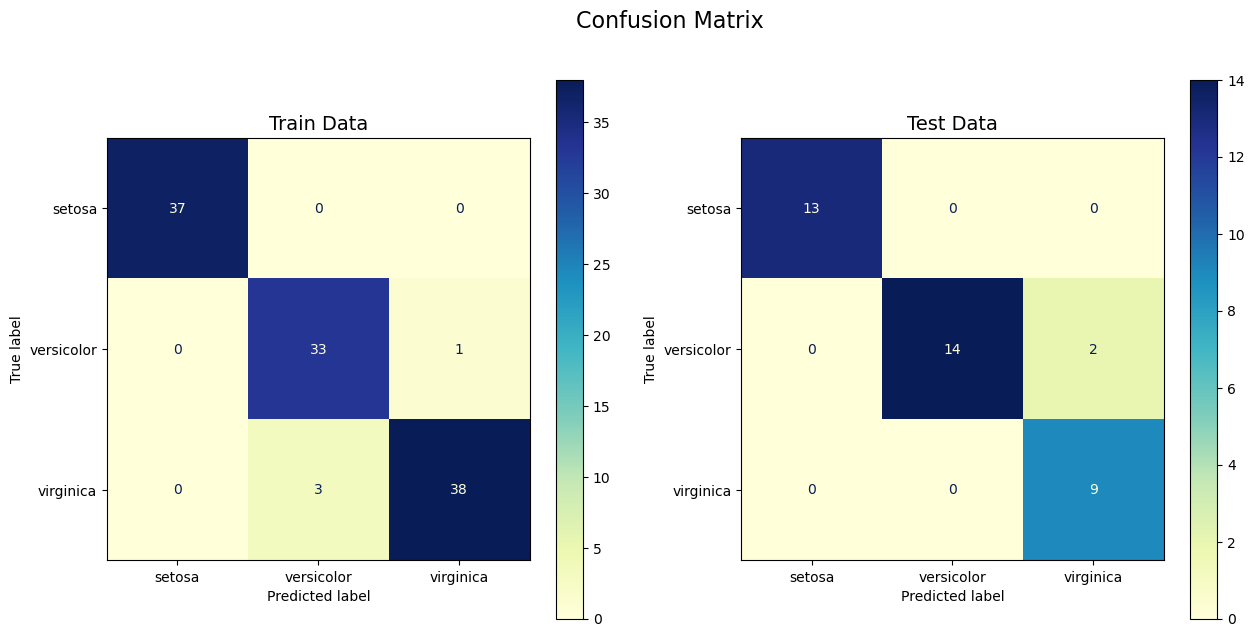

In [42]:
#6.2 Making confusion matrix

# Plotting confusion maxtrix of train and test data
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, sharex=False, figsize=(15, 7))
plot_confusion_matrix(estimator=classifier, X=X_train, y_true=y_train, values_format='.5g', cmap='YlGnBu', ax=ax1)
plot_confusion_matrix(estimator=classifier, X=X_test, y_true=y_test, values_format='.5g', cmap='YlGnBu', ax=ax2)
ax1.set_title(label='Train Data', size=14)
ax2.set_title(label='Test Data', size=14)
ax1.grid(b=False)
ax2.grid(b=False)
plt.suptitle(t='Confusion Matrix', size=16)
plt.show()

In [43]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        13
  versicolor       1.00      0.88      0.93        16
   virginica       0.82      1.00      0.90         9

    accuracy                           0.95        38
   macro avg       0.94      0.96      0.94        38
weighted avg       0.96      0.95      0.95        38



In [ ]:
#The difference in the accuracy score of train and test dataset is =5%. Thus the model is fitted well.

In [45]:
#7.1 To see why K is taken as 5
#Checking the error

error = []

for k in range (1,40):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    error.append(np.mean(y_pred!=y_test))

In [46]:
len(error)

39

In [47]:
plt.style.use("classic")

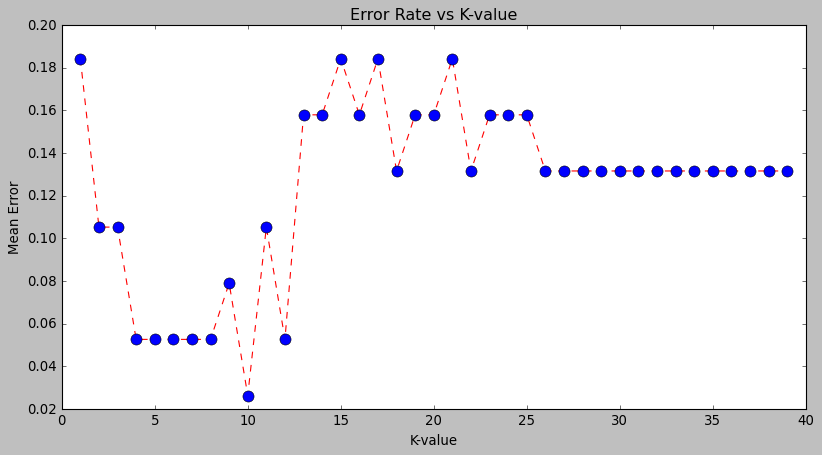

In [48]:
plt.figure(figsize=(12,6))
plt.plot(range(1,40), error, color='red', linestyle='dashed', marker='o',
        markerfacecolor='blue', markersize=10)
plt.title("Error Rate vs K-value")
plt.xlabel('K-value')
plt.ylabel("Mean Error")
plt.show()

In [ ]:
#After K>10 the error increases and it is inversely related to accuracy